In [ ]:
"""this noteboook : training on real image with different size so it has alot of preprocessing"""

In [38]:
import os 

In [39]:
data_dir='D:\programming\python\pyTrain\\tensorflow\cell_images\cell_images'

In [40]:
os.listdir(data_dir)

[&#39;test&#39;, &#39;train&#39;]

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [42]:
from matplotlib.image import imread

In [43]:
test_path=data_dir+'\\test\\'
train_path=data_dir+'\\train\\'

In [44]:
os.listdir(test_path)

[&#39;parasitized&#39;, &#39;uninfected&#39;]

In [45]:
os.listdir(train_path+'parasitized')[0]

&#39;C100P61ThinF_IMG_20150918_144104_cell_162.png&#39;

In [46]:
para_cell=train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'




In [47]:
imread(para_cell).shape

(148, 142, 3)

&lt;matplotlib.image.AxesImage at 0x1c269f1edf0&gt;

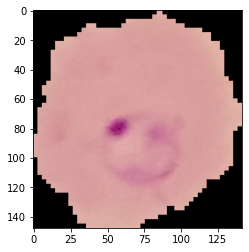

In [48]:
plt.imshow(imread(para_cell))

In [49]:
os.listdir(train_path+'uninfected')[0]

&#39;C100P61ThinF_IMG_20150918_144104_cell_128.png&#39;

In [50]:
uneffected_cell=train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'




&lt;matplotlib.image.AxesImage at 0x1c269f5e9d0&gt;

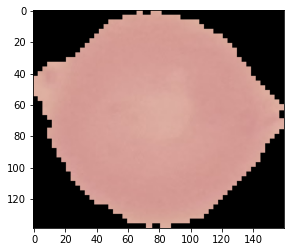

In [51]:
plt.imshow(imread(uneffected_cell))

In [52]:
dim=[]
dim2=[]
for image_filname in os.listdir(test_path+'uninfected'):
    img=imread(test_path+'uninfected\\'+image_filname)
    d1,d2,color=img.shape
    dim.append(d1)
    dim2.append(d2)

&lt;seaborn.axisgrid.JointGrid at 0x1c269f6a3a0&gt;

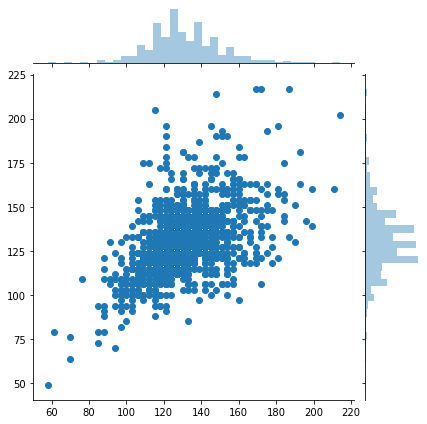

In [53]:
sns.jointplot(dim,dim2)

In [54]:
np.mean(dim)

130.92538461538462

In [55]:
np.mean(dim2)

130.75

In [56]:
image_shape=(130,130,3)

In [57]:
#immage data generator
#image manipulation

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
image_gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

In [60]:
uneffected_cell

&#39;D:\\programming\\python\\pyTrain\\tensorflow\\cell_images\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png&#39;

In [61]:
uneffected_cell=imread(uneffected_cell)

In [62]:
uneffected_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

&lt;matplotlib.image.AxesImage at 0x1c26e2f72b0&gt;

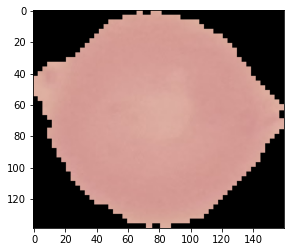

In [63]:
plt.imshow(uneffected_cell)

&lt;matplotlib.image.AxesImage at 0x1c26e32ff10&gt;

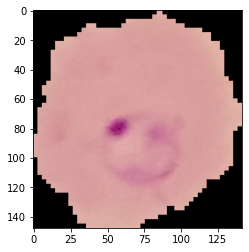

In [64]:
para_celli=imread(para_cell)
plt.imshow(para_celli)

&lt;matplotlib.image.AxesImage at 0x1c269f47f40&gt;

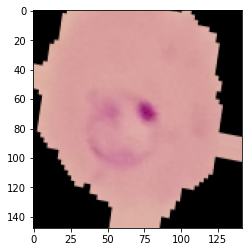

In [65]:
plt.imshow(image_gen.random_transform(para_celli))

In [66]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


&lt;tensorflow.python.keras.preprocessing.image.DirectoryIterator at 0x1c269fd20a0&gt;

In [67]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


&lt;tensorflow.python.keras.preprocessing.image.DirectoryIterator at 0x1c269fd2400&gt;

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

In [69]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [70]:
model.summary()

Model: &quot;sequential_1&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)  

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
earl=EarlyStopping(monitor='val_loss',patience=2)

In [73]:
batch_size=16

In [74]:
train_image_gen=image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary')

Found 24958 images belonging to 2 classes.


In [75]:
test_image_gen=image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [76]:
train_image_gen.class_indices

{&#39;parasitized&#39;: 0, &#39;uninfected&#39;: 1}

In [ ]:
model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[earl])

In [78]:
from tensorflow.keras.models import load_model


In [79]:
model=load_model("D:\programming\python\pyTrain\\tensorflow\FINAL_TF2_FILES\TF_2_Notebooks_and_Data\\04-CNNs\malaria_detector.h5")

In [80]:
model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)    

In [81]:
model.evaluate(test_image_gen)

163/163 [==============================] - 25s 153ms/step - loss: 35.9721 - accuracy: 0.8719


[35.97212219238281, 0.8719230890274048]

In [82]:
pred=model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [83]:
predictions=pred > 0.8

In [84]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [85]:
len(predictions)

2600

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.88      2600
   macro avg       0.89      0.88      0.87      2600
weighted avg       0.89      0.88      0.87      2600



In [88]:
#from tensorflow.keras.preprocessing import image


In [91]:
para_cell

&#39;D:\\programming\\python\\pyTrain\\tensorflow\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png&#39;

In [92]:
from tensorflow.keras.preprocessing import image

In [94]:
my_image=image.load_img(para_cell,target_size=image_shape)

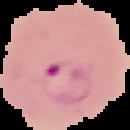

In [98]:
display(my_image)

In [99]:
model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)    

In [112]:
my_image_arr=image.img_to_array(my_image)

In [114]:
my_image_arr=my_image_arr.reshape(1,130,130,3)

In [104]:
my_image_arr= np.expand_dims(my_image_arr,axis=0)

In [115]:
model.predict(my_image_arr)

array([[0.]], dtype=float32)